<a href="https://colab.research.google.com/github/Anish32/fraud-dectection/blob/main/Financial_Fraud_Detection_using_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [7]:
df=pd.read_csv('/content/Synthetic_Financial_datasets_log.csv')
df1=df.copy()

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531542 entries, 0 to 531541
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            531542 non-null  int64  
 1   type            531542 non-null  object 
 2   amount          531542 non-null  float64
 3   nameOrig        531541 non-null  object 
 4   oldbalanceOrg   531541 non-null  float64
 5   newbalanceOrig  531541 non-null  float64
 6   nameDest        531541 non-null  object 
 7   oldbalanceDest  531541 non-null  float64
 8   newbalanceDest  531541 non-null  float64
 9   isFraud         531541 non-null  float64
 10  isFlaggedFraud  531541 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 44.6+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,531542.000000,5.315420e+05,5.315410e+05,5.315410e+05,5.315410e+05,5.315410e+05,531541.000000,531541.0
mean,14.268306,1.640228e+05,9.079057e+05,9.276881e+05,9.817339e+05,1.155635e+06,0.000442,0.0
std,3.895257,2.690207e+05,3.009955e+06,3.047056e+06,2.332237e+06,2.499876e+06,0.021022,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.308764e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,15.000000,7.996262e+04,1.849700e+04,0.000000e+00,1.209360e+05,2.201680e+05,0.000000,0.0
75%,18.000000,2.192811e+05,1.664392e+05,2.057676e+05,8.976792e+05,1.193185e+06,0.000000,0.0
max,20.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [11]:
df.shape

(531542, 11)

In [12]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


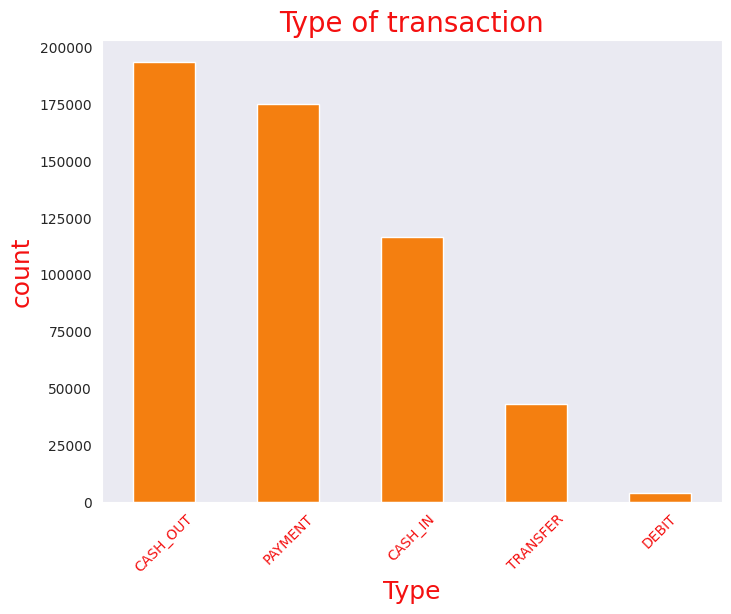

In [15]:
sns.set_style("dark")
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010', fontsize = 20)
plt.xticks(rotation = 45, color = '#F41010')
plt.xlabel('Type', fontsize = 18, color = '#F41010')
plt.ylabel('count', fontsize = 18, color = '#F41010')
plt.show()

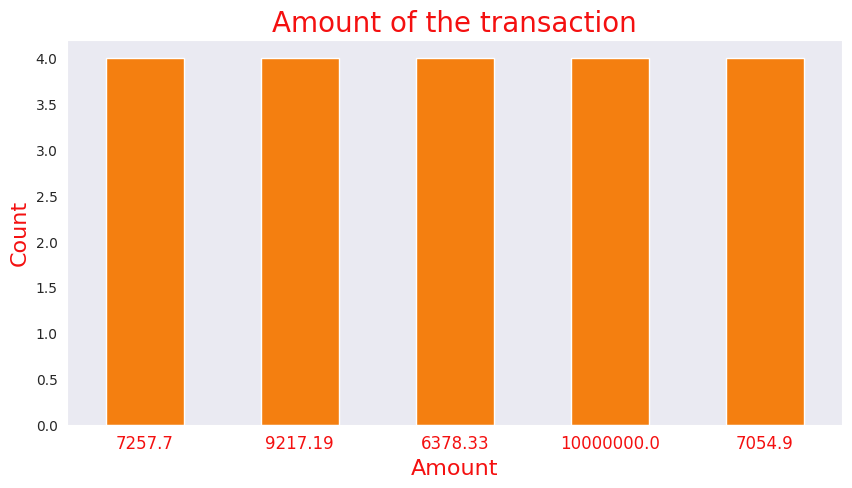

In [16]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar',  color = '#F47F10')
plt.title("Amount of the transaction", fontsize = 20, color = "#F41010")
plt.xticks(rotation = 0, fontsize = 12, color = '#F41010')
plt.xlabel('Amount', fontsize = 16, color = '#F41010')
plt.ylabel('Count', fontsize = 16, color = '#F41010')
plt.show()

In [17]:
df.groupby('type').count()['amount']

,amount
type,
CASH_IN,116271
CASH_OUT,193499
DEBIT,3872
PAYMENT,174829
TRANSFER,43070


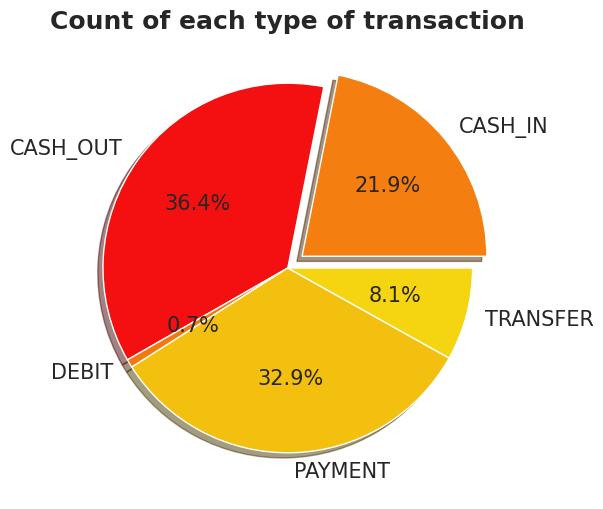

In [18]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

In [19]:
df.groupby(['type','isFraud']).count()

step  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                            
CASH_IN  0.0      116271  116271    116271         116271          116271   
CASH_OUT 0.0      193377  193377    193377         193377          193377   
         1.0         122     122       122            122             122   
DEBIT    0.0        3872    3872      3872           3872            3872   
PAYMENT  0.0      174829  174829    174829         174829          174829   
TRANSFER 0.0       42957   42957     42957          42957           42957   
         1.0         113     113       113            113             113   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0.0        116271          116271          116271          116271  
CASH_OUT 0.0        193377          193377          193377          193377  
         1.0           122             122             122             122  
DEBIT    0.0          3872            3872            3872            3872  
PAYMENT  0.0        174829          174829          174829          174829  
TRANSFER 0.0         42957           42957           42957           42957  
         1.0           113             113             113             113

#correlation matrix

In [20]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

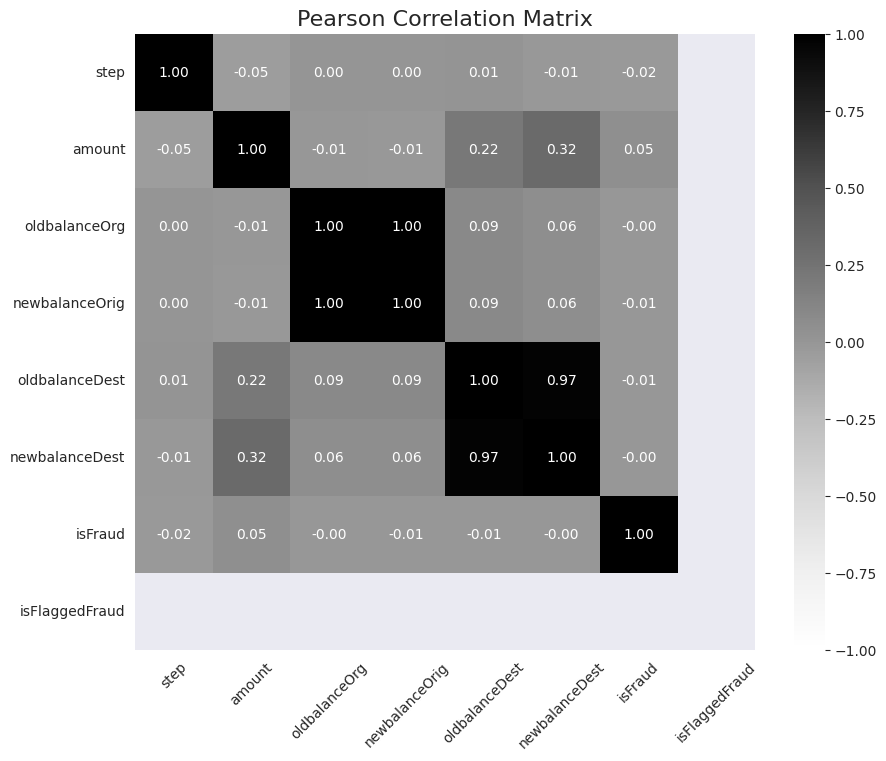

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [22]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [23]:
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [24]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0.0,0.0
1,1,PAYMENT,1864.28,0.0,0.0
2,1,TRANSFER,181.00,1.0,0.0
3,1,CASH_OUT,181.00,1.0,0.0
4,1,PAYMENT,11668.14,0.0,0.0


In [25]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [26]:
for col in ['step']:
  if df[col].dtype == 'object':
    try:
      df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
      df.drop(col, axis=1, inplace=True)
      print(f"Column '{col}' dropped due to non-numeric values.")

In [27]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [28]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(X_test)

**Accuracy**

In [32]:
#accuracy
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy of logistic regression {accuracy_lr}")

Accuracy of logistic regression 0.9995861121824117


**precision**

In [33]:
precision_lr = precision_score(y_test, y_pred)
print(f"Precision of logistic regression {precision_lr}")

Precision of logistic regression 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**recall**

In [34]:
recall_lr = recall_score(y_test, y_pred)
print(f"Recall of logistic regression {recall_lr}")

Recall of logistic regression 0.0


**classification_report**

In [35]:
classification_lr = classification_report(y_test, y_pred)
print(f"Classification Report of logistic regression\n {classification_lr}")

Classification Report of logistic regression
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106265
         1.0       0.00      0.00      0.00        44

    accuracy                           1.00    106309
   macro avg       0.50      0.50      0.50    106309
weighted avg       1.00      1.00      1.00    106309



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision Tree

In [36]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred = dt.predict(X_test)

**accuracy**

In [38]:
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree {accuracy_dt}")

Accuracy of Decision Tree 0.9993227290257645


**precision**

In [39]:
precision_dt = precision_score(y_test, y_pred)
print(f"Precision of Decision Tree {precision_dt}")

Precision of Decision Tree 0.13157894736842105


**recall**

In [40]:
recall_dt = recall_score(y_test, y_pred)
print(f"Recall of Decision Tree {recall_dt}")

Recall of Decision Tree 0.11363636363636363


**classification_report**

In [41]:
classification_dt = classification_report(y_test, y_pred)
print(f"Classification Report of Decision Tree\n {classification_dt}")

Classification Report of Decision Tree
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106265
         1.0       0.13      0.11      0.12        44

    accuracy                           1.00    106309
   macro avg       0.57      0.56      0.56    106309
weighted avg       1.00      1.00      1.00    106309



#Multi layer perceptron classifier(MLP)

In [42]:
mlp = MLPClassifier(hidden_layer_sizes= 10, batch_size= 32, learning_rate= 'adaptive', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=10, learning_rate='adaptive')

In [43]:
y_pred = mlp.predict(X_test)

**accuracy**

In [44]:
accuracy_mlp = accuracy_score(y_test, y_pred)
print(f"Accuracy of MLP Classifier {accuracy_mlp}")

Accuracy of MLP Classifier 0.9996049252650293


**precision**

In [45]:
precision_mlp = precision_score(y_test, y_pred)
print(f"Precision of MLP Classifier {precision_mlp}")

Precision of MLP Classifier 1.0


**recall**

In [46]:
recall_mlp = recall_score(y_test, y_pred)
print(f"Recall of MLP Classifier {recall_mlp}")

Recall of MLP Classifier 0.045454545454545456


**classification_report**

In [47]:
classification_mlp = classification_report(y_test, y_pred)
print(f"Classification Report of MLP Classifier\n {classification_mlp}")

Classification Report of MLP Classifier
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106265
         1.0       1.00      0.05      0.09        44

    accuracy                           1.00    106309
   macro avg       1.00      0.52      0.54    106309
weighted avg       1.00      1.00      1.00    106309



#RandomforestClassifier

In [48]:
rm = RandomForestClassifier(n_estimators=100, random_state=42)
rm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = lr.predict(X_test)

**Accuracy**

In [50]:
accuracy_rm = accuracy_score(y_test, y_pred)
print(f"Accuracy of MLP Classifier {accuracy_rm}")

Accuracy of MLP Classifier 0.9995861121824117


**precission**

In [51]:
precision_rm = precision_score(y_test, y_pred)
print(f"Precision of rm Classifier {precision_rm}")

Precision of rm Classifier 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Recall**

In [52]:
recall_rm = recall_score(y_test, y_pred)
print(f"Recall of rm Classifier {recall_rm}")

Recall of rm Classifier 0.0


**classification_report**

In [53]:
classification_rm = classification_report(y_test, y_pred)
print(f"Classification Report of rm Classifier\n {classification_rm}")

Classification Report of rm Classifier
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106265
         1.0       0.00      0.00      0.00        44

    accuracy                           1.00    106309
   macro avg       0.50      0.50      0.50    106309
weighted avg       1.00      1.00      1.00    106309



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred_knn = knn.predict(X_test)

**accuracy**

In [56]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNeighborsClassifier: {accuracy_knn}")

Accuracy of KNeighborsClassifier: 0.9996049252650293


**precision**

In [57]:
precision_knn = precision_score(y_test, y_pred_knn)
print(f"Precision of KNeighborsClassifier: {precision_knn}")

Precision of KNeighborsClassifier: 1.0


**recall**

In [58]:
recall_knn = recall_score(y_test, y_pred_knn)
print(f"Recall of KNeighborsClassifier: {recall_knn}")

Recall of KNeighborsClassifier: 0.045454545454545456


**classification_report**

In [59]:
cm_knn = classification_report(y_test, y_pred_knn)
print("classification_report of KNeighborsClassifier:")
print(cm_knn)

classification_report of KNeighborsClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106265
         1.0       1.00      0.05      0.09        44

    accuracy                           1.00    106309
   macro avg       1.00      0.52      0.54    106309
weighted avg       1.00      1.00      1.00    106309



#naive_bayes

In [60]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred_nb = nb_classifier.predict(X_test)

**accuracy**

In [62]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes: {accuracy_nb}")

Accuracy of Naive Bayes: 0.9882136037400409


**precision**

In [63]:
precision_nb = precision_score(y_test, y_pred_nb)
print(f"Precision of Naive Bayes: {precision_nb}")

Precision of Naive Bayes: 0.007334963325183374


**recall**

In [64]:
recall_nb = recall_score(y_test, y_pred_nb)
print(f"Recall of Naive Bayes: {recall_nb}")

Recall of Naive Bayes: 0.20454545454545456


**classification_report**

In [65]:
classification_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report of Naive Bayes:")
print(classification_report_nb)

Classification Report of Naive Bayes:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    106265
         1.0       0.01      0.20      0.01        44

    accuracy                           0.99    106309
   macro avg       0.50      0.60      0.50    106309
weighted avg       1.00      0.99      0.99    106309



#GradientBoostingClassifier


In [66]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
y_pred_gb = gb_classifier.predict(X_test)

**accuracy**

In [68]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting: {accuracy_gb}")

Accuracy of Gradient Boosting: 0.999567299099794


 **precision**

In [69]:
precision_gb = precision_score(y_test, y_pred_gb)
print(f"Precision of Gradient Boosting: {precision_gb}")

Precision of Gradient Boosting: 0.0


**recall**

In [70]:
recall_gb = recall_score(y_test, y_pred_gb)
print(f"Recall of Gradient Boosting: {recall_gb}")

Recall of Gradient Boosting: 0.0


**classification_report**

In [71]:
classification_report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report of Gradient Boosting:")
print(classification_report_gb)

Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106265
         1.0       0.00      0.00      0.00        44

    accuracy                           1.00    106309
   macro avg       0.50      0.50      0.50    106309
weighted avg       1.00      1.00      1.00    106309



#Comparing the model

In [72]:
performance_df = pd.DataFrame({
    'models': ['Multi Layer Perceptron', 'Logistic Regression', 'Decision Tree', 'randomforest', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'accuracy': [accuracy_mlp, accuracy_lr, accuracy_dt, accuracy_rm, accuracy_gb, accuracy_knn, accuracy_nb],
    'precision': [precision_mlp, precision_lr, precision_dt, precision_rm, precision_gb, precision_knn, precision_nb],
    'recall': [recall_mlp, recall_lr, recall_dt, recall_rm, recall_gb, recall_knn, recall_nb]
})
performance_df

,models,accuracy,precision,recall
0,Multi Layer Perceptron,0.999605,1.000000,0.045455
1,Logistic Regression,0.999586,0.000000,0.000000
2,Decision Tree,0.999323,0.131579,0.113636
3,randomforest,0.999586,0.000000,0.000000
4,GradientBoostingClassifier,0.999567,0.000000,0.000000
5,KNeighborsClassifier,0.999605,1.000000,0.045455
6,GaussianNB,0.988214,0.007335,0.204545


**If you need a safe and balanced model: Gradient Boosting Classifier is a good choice.**

**If you want maximum accuracy and precision: Multi-Layer Perceptron (MLP) is the best.**

**If recall is critical (e.g., in medical diagnosis where missing a positive case is bad): Decision Tree may be preferable**

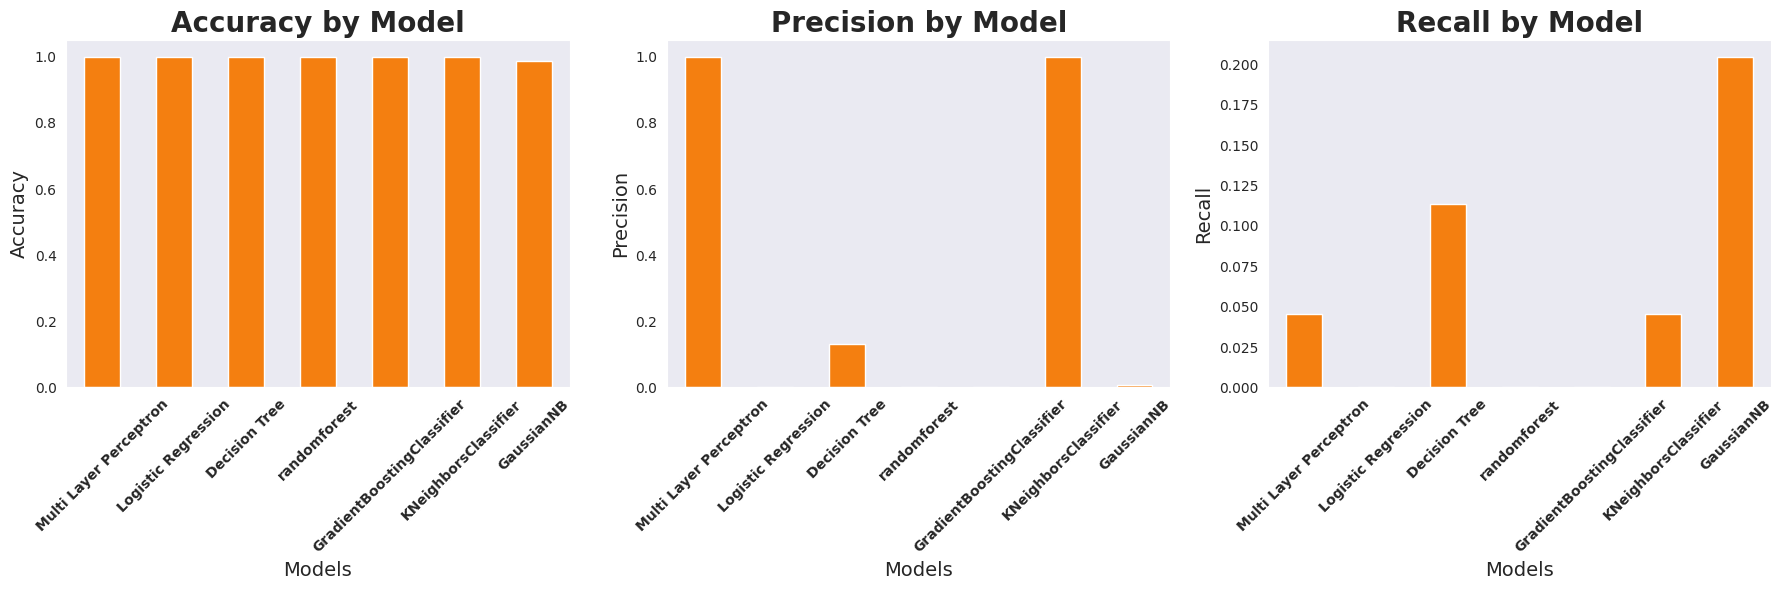

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind='bar', ax=ax[i], color = '#F47F10')


    ax[i].set_xticklabels(performance_df['models'], rotation=45, fontweight = 'bold')

    ax[i].set_xlabel('Models', fontsize = 14)
    ax[i].set_ylabel(metric.capitalize(), fontsize = 14)
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

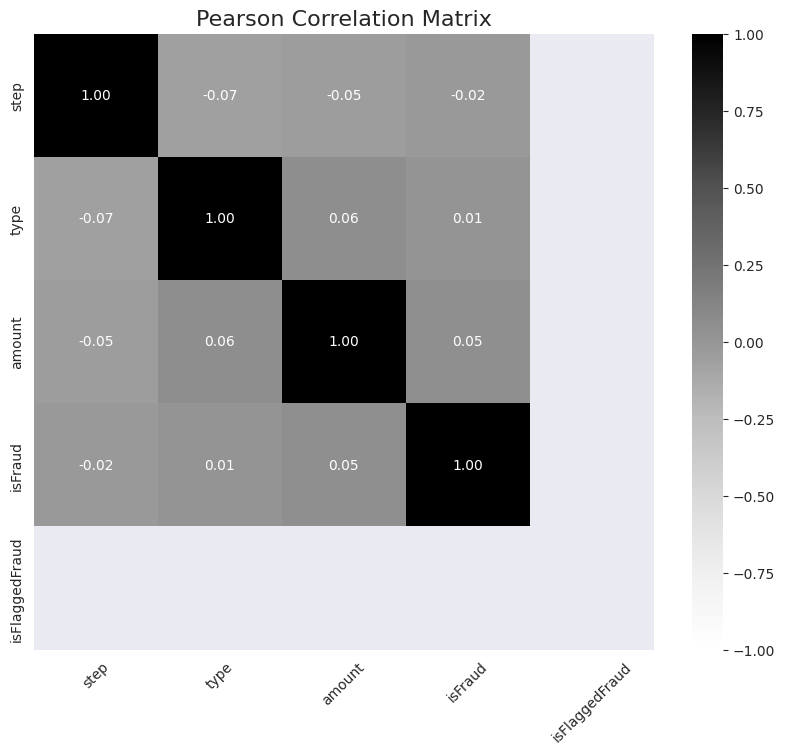

In [74]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

correlation = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="Greys", annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [87]:
import pickle

# Assuming 'gb_classifier' is your trained Gradient Boosting model
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(gb_classifier, file)

In [89]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [92]:
 !pip install streamlit -q

In [94]:
!wget -q -O - ipv4.icanhazip.com

35.198.200.147


In [95]:
! streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴your url is: https://shy-sides-shave.loca.lt
^C
